In [1]:
import wurst
import bw2io, bw2data
import bw2calc
import pandas as pd
import numpy as np
import matplotlib as plt
import random
import itertools
from statistics import mean
import xarray as xr

In [ ]:
bw2io.restore_project_directory("/srv/data/ecoinvent-3.9.1-cutoff.tar.gz", project_name="K_iss")

In [2]:
bw2data.projects.set_current("K_iss")

In [3]:
bw2data.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent-3.9.1-cutoff

In [4]:
eidb = bw2data.Database("ecoinvent-3.9.1-cutoff")

In [5]:
dataset=xr.open_dataset('CO2_per_mix.nc')
display(dataset)

<xarray.Dataset>
Dimensions:                        (Date: 365, year: 31, Hour: 24, technology: 9)
Coordinates:
  * Date                           (Date) int32 1 2 3 4 5 ... 362 363 364 365
  * year                           (year) float64 2.02e+03 ... 2.05e+03
  * Hour                           (Hour) int32 0 1 2 3 4 5 ... 19 20 21 22 23
  * technology                     (technology) object 'Autre renouvelables' ...
Data variables:
    __xarray_dataarray_variable__  (Date, year, Hour, technology) float64 ...

In [6]:
test02=dataset.copy()
test03=test02.sum(dim="technology")
test03

<xarray.Dataset>
Dimensions:                        (Date: 365, year: 31, Hour: 24)
Coordinates:
  * Date                           (Date) int32 1 2 3 4 5 ... 362 363 364 365
  * year                           (year) float64 2.02e+03 ... 2.05e+03
  * Hour                           (Hour) int32 0 1 2 3 4 5 ... 19 20 21 22 23
Data variables:
    __xarray_dataarray_variable__  (Date, year, Hour) float64 0.07287 ... 0.0...

In [7]:
carbon_int= dataset.sel(
                #technology=test_tech,
                year=2022,
                Date=1,
                Hour=1,
).to_array().values[0].sum()
print(carbon_int)

valid= test03.sel(
                year=2022,
                Date=1,
                Hour=1,
).to_array().values[0].sum()
print(valid)

0.06641452044438986
0.06641452044438986


In [8]:
year_val=dataset.coords['year'].values
date_val=dataset.coords['Date'].values
hour_val=dataset.coords['Hour'].values

In [31]:
year_amounts=[]

for year in year_val:
    print(year)
    Date_amounts = []
    for Date in date_val:
            Hour_amounts = []
            for hour in hour_val:
                test04=test03.sel(
                    year=year,
                    Date=Date,
                    Hour=hour,
                ).to_array().values[0]
#                print(test04)
                Hour_amounts.append(test04)
            Date_amounts.append(Hour_amounts)
    year_amounts.append(Date_amounts)

2020.0
2021.0
2022.0
2023.0
2024.0
2025.0
2026.0
2027.0
2028.0
2029.0
2030.0
2031.0
2032.0
2033.0
2034.0
2035.0
2036.0
2037.0
2038.0
2039.0
2040.0
2041.0
2042.0
2043.0
2044.0
2045.0
2046.0
2047.0
2048.0
2049.0
2050.0


In [33]:
print(year_amounts)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [34]:
the_dic={}

for yeari in year_val:
    d=pd.DataFrame()
    print(yeari)
    #Date_amounts = []
    for Datei in date_val:
        Hour_amounts = []
        for houri in hour_val:
                test04=test03.sel(
                    year=yeari,
                    Date=Datei,
                    Hour=houri,
                ).to_array().values[0]
                Hour_amounts.append(test04)
        d2=pd.DataFrame(Hour_amounts)
        d=pd.concat([d,d2])
    the_dic[yeari]=d

2020.0
2021.0
2022.0
2023.0
2024.0
2025.0
2026.0
2027.0
2028.0
2029.0
2030.0
2031.0
2032.0
2033.0
2034.0
2035.0
2036.0
2037.0
2038.0
2039.0
2040.0
2041.0
2042.0
2043.0
2044.0
2045.0
2046.0
2047.0
2048.0
2049.0
2050.0


In [69]:
the_dic[2022].drop(['level_0', 'index'], axis=1)

,0
0,0.070319
1,0.066415
2,0.059394
3,0.046770
4,0.041239
...,...
8755,0.063837
8756,0.063370
8757,0.062366
8758,0.062850


In [ ]:
# #grid[]

test=carbon_int

# #for hours in range(1, 24):

# #    if carbon_int= dataset.sel(
# #                #technology=test_tech,
# #                year=2022,
#                 Date=1,
#                 Hour=hours,
#     ).to_array().values[0]
#     print(carbon_int)

In [ ]:
the_dic[2022].drop(['level_0', 'index'], axis=1)

year= 2022
timestep = pd.Series(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31 23:00:00', freq='H'))
dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
num_repeats = 24

df01=pd.DataFrame()
df01['Timestamp']=timestep
df01['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
df01['Hour'] = pd.to_datetime(a['Timestamp']).dt.strftime('%H:%M:%S')
df01['CO2']=the_dic[2022][0]#.reset_index(inplace=True)
df01

test1=df01.set_index("Timestamp")
test1#.drop(['Date','Hour'], axis=1)

opt=pd.DataFrame()
#opt['Hour']= test.lookup(test.index, test['Hour'])
opt['CO2']=test1.groupby("Date").min(numeric_only=True)
opt

# Assuming you already have your DataFrame
# Let's call it 'df'

# Convert the index to a datetime object (if not already)
test1.index = pd.to_datetime(test.index)

# Group the DataFrame by the date
grouped = test1.groupby(test1.index.date)

# Initialize empty lists to store the result
dates = []
lowest_hour = []

# Iterate through the groups
for date, group in grouped:
    # Find the row with the lowest CO2 value for each group
    min_row = group.loc[group['CO2'].idxmin()]
    dates.append(date)
    lowest_hour.append(min_row['Hour'])

# Create a new DataFrame with the results
result_df = pd.DataFrame({'Date': dates, 'Lowest_CO2_Hour': lowest_hour})

# Display the result
print(result_df)

result_df["Lowest_CO2_Hour"]=result_df["Lowest_CO2_Hour"].replace(":00:00", "", regex=True)
result_df["Lowest_CO2_Hour"]=result_df["Lowest_CO2_Hour"].astype(int)

pes= test1.groupby("Date").max(numeric_only=True)
pes

pes_con_v1= b['total_e_consumption_1'].values*pes['CO2'].values
pes_con_v1.sum()

pes_con= 14.4*pes['CO2'].values
pes_con.sum()

opt_con= 14.4*opt['CO2'].values
opt_con.sum()

opt_con_v1= b['total_e_consumption_1'].values*opt['CO2'].values
opt_con_v1.sum()

In [112]:
year= 2022
timestep = pd.Series(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31 23:00:00', freq='H'))
dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
num_repeats = 24

df01=pd.DataFrame()
df01['Timestamp']=timestep
df01['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
df01['Hour'] = pd.to_datetime(a['Timestamp']).dt.strftime('%H:%M:%S')
df01['CO2']=the_dic[2022][0]#.reset_index(inplace=True)
df01

,Timestamp,Date,Hour,CO2
0,2022-01-01 00:00:00,2022-01-01,00:00:00,0.070319
1,2022-01-01 01:00:00,2022-01-01,01:00:00,0.066415
2,2022-01-01 02:00:00,2022-01-01,02:00:00,0.059394
3,2022-01-01 03:00:00,2022-01-01,03:00:00,0.046770
4,2022-01-01 04:00:00,2022-01-01,04:00:00,0.041239
...,...,...,...,...
8755,2022-12-31 19:00:00,2022-12-31,19:00:00,0.063837
8756,2022-12-31 20:00:00,2022-12-31,20:00:00,0.063370
8757,2022-12-31 21:00:00,2022-12-31,21:00:00,0.062366
8758,2022-12-31 22:00:00,2022-12-31,22:00:00,0.062850


In [129]:
the_dic[2022].drop(['level_0','index'], axis=1)

,0
0,0.070319
1,0.066415
2,0.059394
3,0.046770
4,0.041239
...,...
8755,0.063837
8756,0.063370
8757,0.062366
8758,0.062850


In [78]:
# df = pd.read_csv('FR_2022_hourly.csv', usecols=["Datetime (UTC)", "CO2"])
# df

In [79]:
# df.sort_values(by='Datetime (UTC)')

In [130]:
year= 2022
timestep = pd.Series(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31 23:00:00', freq='H'))
dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
num_repeats = 24

In [131]:
# a= pd.DataFrame({'Timestamp': timestep})
# a['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
# a['Hour'] = pd.to_datetime(a['Timestamp']).dt.strftime('%H:%M:%S')
# a['CO2']=df["CO2"]
# a

In [132]:
def sort_data(group):
    return group.sort_values('CO2', ascending=True)

grouped_data1 = df01.groupby('Date').apply(sort_data)
grouped_data1

Timestamp       Date      Hour       CO2
Date                                                              
2022-01-01 4    2022-01-01 04:00:00 2022-01-01  04:00:00  0.041239
           5    2022-01-01 05:00:00 2022-01-01  05:00:00  0.041423
           6    2022-01-01 06:00:00 2022-01-01  06:00:00  0.041679
           7    2022-01-01 07:00:00 2022-01-01  07:00:00  0.042396
           8    2022-01-01 08:00:00 2022-01-01  08:00:00  0.042766
...                             ...        ...       ...       ...
2022-12-31 8748 2022-12-31 12:00:00 2022-12-31  12:00:00  0.063393
           8755 2022-12-31 19:00:00 2022-12-31  19:00:00  0.063837
           8754 2022-12-31 18:00:00 2022-12-31  18:00:00  0.064043
           8752 2022-12-31 16:00:00 2022-12-31  16:00:00  0.064318
           8753 2022-12-31 17:00:00 2022-12-31  17:00:00  0.065365

[8760 rows x 4 columns]

In [133]:
# def sort_data(group):
#     return group.sort_values('CO2', ascending=True)

# grouped_data = a.groupby('Date').apply(sort_data)
# grouped_data

In [134]:
#charge= pd.read_csv('emobpy_timeseries_hourly.csv')#, usecols=["datetime", "Consumer_0_elec"])

# ele_cons_day=18.58 #kWh of EV ID 80 of the 01/01/2020

In [135]:
test1=df01.set_index("Timestamp")
test1#.drop(['Date','Hour'], axis=1)

,Date,Hour,CO2
Timestamp,,,
2022-01-01 00:00:00,2022-01-01,00:00:00,0.070319
2022-01-01 01:00:00,2022-01-01,01:00:00,0.066415
2022-01-01 02:00:00,2022-01-01,02:00:00,0.059394
2022-01-01 03:00:00,2022-01-01,03:00:00,0.046770
2022-01-01 04:00:00,2022-01-01,04:00:00,0.041239
...,...,...,...
2022-12-31 19:00:00,2022-12-31,19:00:00,0.063837
2022-12-31 20:00:00,2022-12-31,20:00:00,0.063370
2022-12-31 21:00:00,2022-12-31,21:00:00,0.062366


In [136]:
test1['CO2'].mean()

0.05879760756776047

In [137]:
# test=a.set_index("Timestamp")
# test#.drop(['Date','Hour'], axis=1)

In [138]:
opt=pd.DataFrame()
#opt['Hour']= test.lookup(test.index, test['Hour'])
opt['CO2']=test1.groupby("Date").min(numeric_only=True)
opt

,CO2
Date,
2022-01-01,0.041239
2022-01-02,0.059707
2022-01-03,0.047108
2022-01-04,0.054300
2022-01-05,0.069844
...,...
2022-12-27,0.034486
2022-12-28,0.034994
2022-12-29,0.036132


In [139]:
# Assuming you already have your DataFrame
# Let's call it 'df'

# Convert the index to a datetime object (if not already)
test1.index = pd.to_datetime(test.index)

# Group the DataFrame by the date
grouped = test1.groupby(test1.index.date)

# Initialize empty lists to store the result
dates = []
lowest_hour = []

# Iterate through the groups
for date, group in grouped:
    # Find the row with the lowest CO2 value for each group
    min_row = group.loc[group['CO2'].idxmin()]
    dates.append(date)
    lowest_hour.append(min_row['Hour'])

# Create a new DataFrame with the results
result_df = pd.DataFrame({'Date': dates, 'Lowest_CO2_Hour': lowest_hour})

# Display the result
print(result_df)


           Date Lowest_CO2_Hour
0    2022-01-01        04:00:00
1    2022-01-02        04:00:00
2    2022-01-03        05:00:00
3    2022-01-04        05:00:00
4    2022-01-05        05:00:00
..          ...             ...
360  2022-12-27        19:00:00
361  2022-12-28        19:00:00
362  2022-12-29        00:00:00
363  2022-12-30        04:00:00
364  2022-12-31        03:00:00

[365 rows x 2 columns]


In [140]:
result_df["Lowest_CO2_Hour"]=result_df["Lowest_CO2_Hour"].replace(":00:00", "", regex=True)

In [141]:
result_df["Lowest_CO2_Hour"]=result_df["Lowest_CO2_Hour"].astype(int)

In [ ]:
result_df["Lowest_CO2_Hour"]=result_df["Lowest_CO2_Hour"].replace(":00:00", "", regex=True)

result_df2 = result_df
result_df2['Month']=pd.DatetimeIndex(result_df2['Date']).month
result_df2=result_df2.drop(columns=['Date'])
result_df2=result_df2[['Month',"Lowest_CO2_Hour"]]
grouped = result_df2.groupby('Month') 

year = []

arr = np.zeros((31, 12))

for i in range(1, 13):
    yup = grouped.get_group(i)
    arr[0:yup["Lowest_CO2_Hour"].values.shape[0], i-1] = yup["Lowest_CO2_Hour"].values

data_best_hr_pr_day = arr.T.shape

new_cbar = plt.matplotlib.colormaps.get_cmap("RdBu").resampled(24)


plt.figure(figsize=(20, 5)) 
plt.pcolormesh(data_best_hr_pr_day, cmap=new_cbar)
plt.xlabel("Day")
plt.ylabel("Month")
plt.title("Best hours to charge every day for a year")
cbar = plt.colorbar()
cbar.ax.set_ylabel('h of the day', rotation=270, labelpad=10)

In [1]:
pes= test1.groupby("Date").max(numeric_only=True)
pes

NameError: name 'test1' is not defined

In [143]:
temp = pd.read_csv('Temperature_France_2022.csv', usecols=["Average_FR"])
temp

,Average_FR
0,9.85
1,11.10
2,10.20
3,10.45
4,6.30
...,...
360,8.00
361,9.80
362,11.70
363,11.15


In [144]:
#Temperature for 2022 originate from: https://www.visualcrossing.com/weather/weather-data-services

# https://doi.org/10.1016/j.jclepro.2019.119403
#The study found that, when the ambient temperature 
#is lower than 10 C, electricity consumption increases 2.4 kWh/100 km for every 5 C decrease in temperature. 
#When it is higher than 28 C, EC increases 2.3 kWh/100 km for every 5 C increase in temperature.

year= 2022
timestep = pd.Series(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31 23:00:00', freq='D'))
dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
num_repeats = 24

b= pd.DataFrame({'Timestamp': timestep})
b['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
b['Hour'] = pd.to_datetime(a['Timestamp']).dt.strftime('%H:%M:%S')
b['Inside temp car'] = list(itertools.repeat(19, 365))
b['Temperature_FR']=temp
b['E_demand@19(kWh/100km)']= list(itertools.repeat(14.4, 365))
b

,Timestamp,Date,Hour,Inside temp car,Temperature_FR,E_demand@19(kWh/100km)
0,2022-01-01,2022-01-01,00:00:00,19,9.85,14.4
1,2022-01-02,2022-01-01,01:00:00,19,11.10,14.4
2,2022-01-03,2022-01-01,02:00:00,19,10.20,14.4
3,2022-01-04,2022-01-01,03:00:00,19,10.45,14.4
4,2022-01-05,2022-01-01,04:00:00,19,6.30,14.4
...,...,...,...,...,...,...
360,2022-12-27,2022-01-16,00:00:00,19,8.00,14.4
361,2022-12-28,2022-01-16,01:00:00,19,9.80,14.4
362,2022-12-29,2022-01-16,02:00:00,19,11.70,14.4
363,2022-12-30,2022-01-16,03:00:00,19,11.15,14.4


In [145]:
s=[]

for item in b['Temperature_FR']:
    if item<=10:
        s.append(((item/5) * 2.4)+14.4),
    else: s.append(0)

b['cold']=s

In [146]:
r=[]

for item in b['Temperature_FR']:
    if item>=25:
        r.append(((item/5) * 2.3)+14.4),
    else: r.append(0)

b['warm']=r

b['total_e_consumption']=b['cold']+b['warm']

In [160]:
t=[]

for item in b['total_e_consumption']:
    if item==0:
        t.append(14.4)
    else: t.append(item)

b['total_e_consumption_1']=t
b.drop(['Timestamp', 'Date', 'Hour'], axis=1)

,Inside temp car,Temperature_FR,E_demand@19(kWh/100km),cold,warm,total_e_consumption,total_e_consumption_1
0,19,9.85,14.4,19.128,0.0,19.128,19.128
1,19,11.10,14.4,0.000,0.0,0.000,14.400
2,19,10.20,14.4,0.000,0.0,0.000,14.400
3,19,10.45,14.4,0.000,0.0,0.000,14.400
4,19,6.30,14.4,17.424,0.0,17.424,17.424
...,...,...,...,...,...,...,...
360,19,8.00,14.4,18.240,0.0,18.240,18.240
361,19,9.80,14.4,19.104,0.0,19.104,19.104
362,19,11.70,14.4,0.000,0.0,0.000,14.400
363,19,11.15,14.4,0.000,0.0,0.000,14.400


In [148]:
pes_con_v1= b['total_e_consumption_1'].values*pes['CO2'].values
pes_con_v1.sum()

406.67940539994527

In [149]:
pes_con= 14.4*pes['CO2'].values
pes_con.sum()

357.7939265773582

In [150]:
opt_con= 14.4*opt['CO2'].values
opt_con.sum()

254.95069147986078

In [151]:
opt_con_v1= b['total_e_consumption_1'].values*opt['CO2'].values
opt_con_v1.sum()

291.77053417262425

In [152]:
avg_fr= [act for act in eidb if 'market for electricity, high voltage'in act['name']
                    and 'FR' in act['location']][0]

avg_fr

'market for electricity, high voltage' (kilowatt hour, FR, None)

In [153]:
ipcc=[method for method in bw2data.methods if 'IPCC' in str(method) 
                                and 'climate change' in str(method)
                                and 'global warming' in str(method)][0]
print(ipcc)
print(type(ipcc))

('IPCC 2013 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')
<class 'tuple'>


In [154]:
lca = bw2calc.LCA({avg_fr:1}, ipcc)
lca.lci()
lca.lcia()
lca.score

0.07445786255260897

In [155]:
avg_con=lca.score*14.4*365
avg_con

391.3505255765128

In [156]:
avg_con_v1=lca.score* b['total_e_consumption_1'].values
avg_con_v1.sum()

440.377156258553

[Text(0, 0, '291.771'),
 Text(0, 0, '440.377'),
 Text(0, 0, '406.679'),
 Text(0, 0, '254.951'),
 Text(0, 0, '391.351'),
 Text(0, 0, '357.794')]

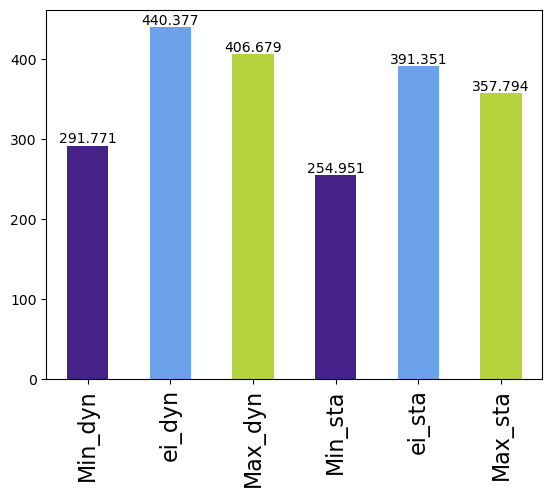

In [157]:
Scores = [sum(opt_con_v1), sum(avg_con_v1), sum(pes_con_v1), sum(opt_con), avg_con, sum(pes_con)]
score_series = pd.Series(Scores)
x_labels = ['Min_dyn', 'ei_dyn', 'Max_dyn', 'Min_sta', 'ei_sta', 'Max_sta']

fig = score_series.plot(kind='bar', color =['#442288', '#6CA2EA', '#B5D33D'])
fig.set_xticklabels(x_labels, fontsize=16)
fig.bar_label(fig.containers[0], label_type='edge')

In [158]:
annual_vkm = 200*0.144*365
annual_vkm
lifetime = 20
lt_mileage = annual_vkm*lifetime
lt_mileage

210239.99999999997